# Data Preprocessing

For two of our datasets (i.e., Bank and Covertype), we have performed preprocessing such as selecting features, removing classes that are too small and adding a header row.


## Bank Dataset

Source: https://archive.ics.uci.edu/ml/datasets/bank+marketing

In [1]:
import pandas as pd

df = pd.read_csv('../data/clean/bank-full.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39439 entries, 0 to 39438
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        39439 non-null  int64 
 1   job        39439 non-null  object
 2   marital    39439 non-null  object
 3   education  39439 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB


In [2]:
# Use "education" as target and only keep features related to it
relevant_columns = ['age', 'job', 'marital', 'education']
df = df[relevant_columns]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39439 entries, 0 to 39438
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        39439 non-null  int64 
 1   job        39439 non-null  object
 2   marital    39439 non-null  object
 3   education  39439 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB


In [8]:
# Only keep classes in "education" with at least 2000 samples
df = df.loc[df['education'].isin([c[0] for c in df['education'].value_counts().items() if c[1] >= 2000])]

# Show if reduction was performed correctly
df['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
Name: education, dtype: int64

In [7]:
# Show number of samples
len(df)

39439

In [11]:
# Export preprocessed dataset
df.to_csv('../data/clean/bank.csv', index=False)

## Covertype Dataset

Source: https://archive.ics.uci.edu/ml/datasets/Covertype

In [1]:
import pandas as pd

df = pd.read_csv('../data/clean/covtype.data', header=None)
df.info()

In [4]:
# Add column names, calling target column "class"
colnames = [f'F{i:02d}' for i in range(len(df.columns) - 1)] + ['class']
df.columns = colnames
df

,F00,F01,F02,F03,F04,F05,F06,F07,F08,F09,...,F45,F46,F47,F48,F49,F50,F51,F52,F53,class
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


In [50]:
# Export preprocessed dataset
# Note: Sampling is performed afterwards with sampling.py script which can be found in "clustering" folder
df.to_csv('../data/clean/covtype.csv', index=False)

# Metadata Extraction

Investigate Covertype dataset to be able to set "placeholders" value in metadata.json for CompletenessPolluter

In [9]:
import pandas as pd

df = pd.read_csv('../data/clean/covtype.csv')

# Show statistics of numerical features (first 10 features) of Covertype dataset
df.iloc[:, : 10].describe()

,F00,F01,F02,F03,F04,F05,F06,F07,F08,F09
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000


In [10]:
# Show how often and which negative numbers occur in F04 -> chose to set placeholder for "F04" feature to -9000
df[df['F04'] < 0]['F04'].value_counts()

-2      5179
-1      4858
-3      3994
-4      3157
-5      3086
        ... 
-142       1
-161       1
-164       1
-163       1
-173       1
Name: F04, Length: 163, dtype: int64

# Plot Generation

The following cells contain the generation code of different plots we have used in our presentations and/or the technical report.

## Effect of Gaussian Noise

Per feature, create a plot showing the effect of Gaussian noise that was added to numerical features by FeatureAccuracyPolluter. For which features, which level of pollution, which seed and how many samples the plot should be created, can be adjusted with the given constants.

In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.ticker import MaxNLocator
from pathlib import Path

from dataset_manager import DatasetManager
from polluters import FeatureAccuracyPolluter

# Adjustable constants
POLLUTION_LEVELS = [0.8]
N_SAMPLES = 20
DATASET = 'letter.arff'
FEATURES = ['width']  # df.columns.tolist()[:-1] # only define numerical columns!
SEED = 2967137

# Load metadata
with open('../metadata.json', 'r') as f:
    metadata = json.load(f)
spec_metadata = metadata[DATASET]

# Load baseline (sampled) dataset
df = pd.read_csv(f'../data/clean/{DATASET.split(".")[0]}_{SEED}.{DATASET.split(".")[1]}')

for feature in FEATURES:
    # Get ground truth feature column
    plotdata = df[[feature]]

    # Setup plot
    sns.set_style('whitegrid')
    fig, ax = plt.subplots(1, len(POLLUTION_LEVELS), figsize=(8, 6))
    plt.suptitle(f'Effect of Noise for {DATASET.split(".")[0].capitalize()} Dataset and {feature.capitalize()} Feature', fontsize=22)

    for i, pol in enumerate(POLLUTION_LEVELS):
        # Get polluted data
        polluter = FeatureAccuracyPolluter(pol, spec_metadata['categorical_cols'], spec_metadata['numerical_cols'], SEED)
        polluted_filename = DatasetManager.polluted_file(Path('../data/polluted/'), DATASET, polluter)
        df_polluted = pd.read_csv(polluted_filename)

        # Add polluted feature values and index column to plotdata
        plotdata[f'{feature}_polluted'] = df_polluted[feature]
        plotdata['sample_id'] = plotdata.reset_index().index

        # Set axis according to number of needed plots
        if len(POLLUTION_LEVELS) > 1:
            axes = ax[i]
        else:
            axes = ax

        # Add lines
        sns.lineplot(data=plotdata.head(N_SAMPLES), x='sample_id', y=feature, label='Ground Truth', ax=axes)
        sns.lineplot(data=plotdata.head(N_SAMPLES), x='sample_id', y=f'{feature}_polluted', color='red', label='Noise Added', ax=axes)

        # Adjust text
        axes.set_title(f'Pollution = {pol}', fontweight='bold', fontsize=22)
        axes.set_xlim(0, N_SAMPLES)
        axes.xaxis.set_major_locator(MaxNLocator(integer=True))
        axes.set_xlabel('Sample ID', fontsize=18)
        axes.set_ylabel(feature.capitalize(), fontsize=18)

    # Export plot for each feature (several subplots for each pollution level are possible)
    plt.tight_layout()
    fig.savefig(f'../plots/{DATASET.split(".")[0]}'
                f'_{feature}'
                f'_{"_".join(sorted([str(pol) for pol in POLLUTION_LEVELS]))}'
                f'_noise_effect.png', dpi=300)
    plt.close()

## ClassBalancePolluter Explanation

In [6]:
import sys
sys.path.append('..')
sys.path.append('../polluters')
from polluters.classbalance import *

In [12]:
from math import ceil, floor

def calc_balance(class_sample_counts):
    m = len(class_sample_counts)
    class_order = sorted(class_sample_counts, reverse=True)

    # maximum distance between two individual classes (= empirical maximum possible sample count)
    max_ind_dist = class_order[0]
    # maximum distance in the whole class system, assuming pairwise distances to be taken only in one direction
    max_tot_dist = ceil(m/2) * floor(m/2) * max_ind_dist

    ind_distances = list()
    for i, majority_count in enumerate(class_order):
        for minority_count in class_order[i + 1:]:
            ind_distances.append(majority_count - minority_count)

    return 1 - (sum(ind_distances) / max_tot_dist)

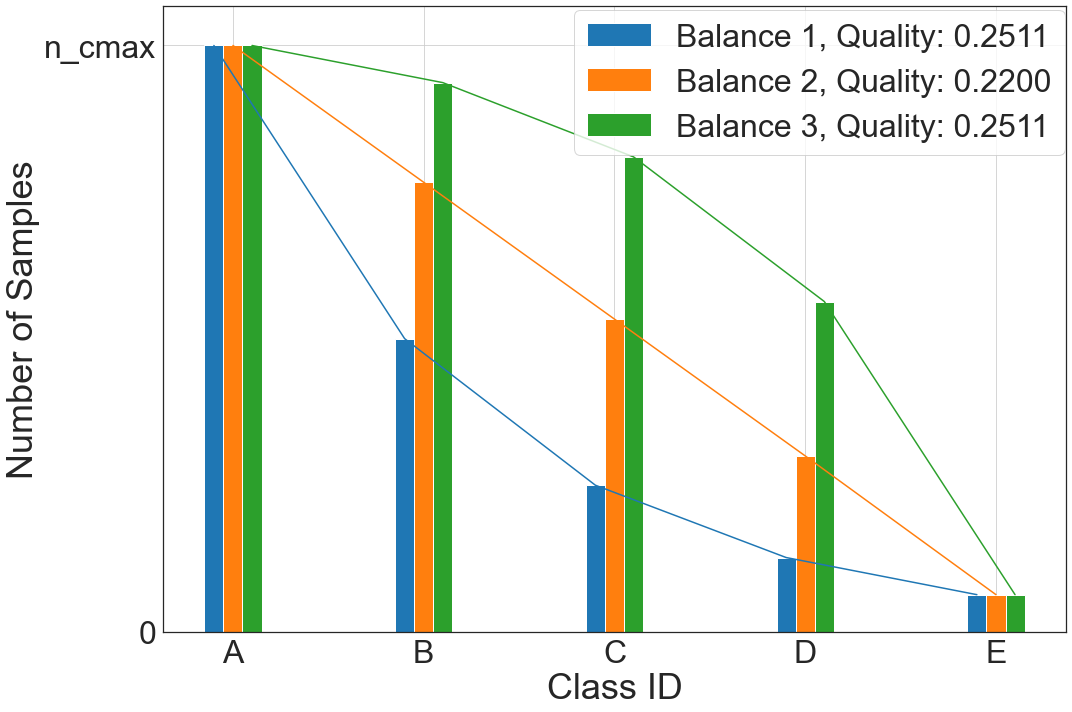

In [70]:
data = [300, 150, 75, 38, 19]
data2 = [300, 281, 243, 169, 19]
data3 = [300, 230, 160, 90, 19]
data4 = [300, 280, 260, 200, 19]

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style('whitegrid')
plt.rcParams["axes.edgecolor"] = "0.15"
plt.rcParams["axes.linewidth"] = 1.25

fig, ax = plt.subplots(figsize=(15, 10))
ax.set_ylim(0, 320)

ax.set_xticks(np.arange(5))
ax.set_yticks([0, 300])
ax.set_xticklabels(['A', 'B', 'C', 'D', 'E'], size=32)
ax.set_yticklabels([0, 'n_cmax'], size=32)

#ax.set_title('Per Class Sample Count, sorted descending', size=24)
ax.set_xlabel('Class ID', size=36)
ax.set_ylabel('Number of Samples', size=36)

barWidth = 0.1

ax.bar(np.arange(5)-barWidth, data, width=barWidth, label=f'Balance 1, Quality: {calc_balance(data):.4f}')
ax.bar(np.arange(5), data3, width=barWidth, label=f'Balance 2, Quality: {calc_balance(data3):.4f}')
ax.bar(np.arange(5)+barWidth, data2, width=barWidth, label=f'Balance 3, Quality: {calc_balance(data2):.4f}')
#ax.bar(np.arange(5)+1.5*barWidth, data4, width=barWidth, label=f'Balance D, Quality: {calc_balance(data4):.4f}')

ax.plot(np.arange(5)-barWidth, data)
ax.plot(np.arange(5), data3)
ax.plot(np.arange(5)+barWidth, data2)
#ax.plot(np.arange(5), data4)

fig.tight_layout()
fig.legend(loc=(0.535, 0.782),  fontsize=32)
fig.savefig('../plots/class_balance_examples.png', dpi=300)

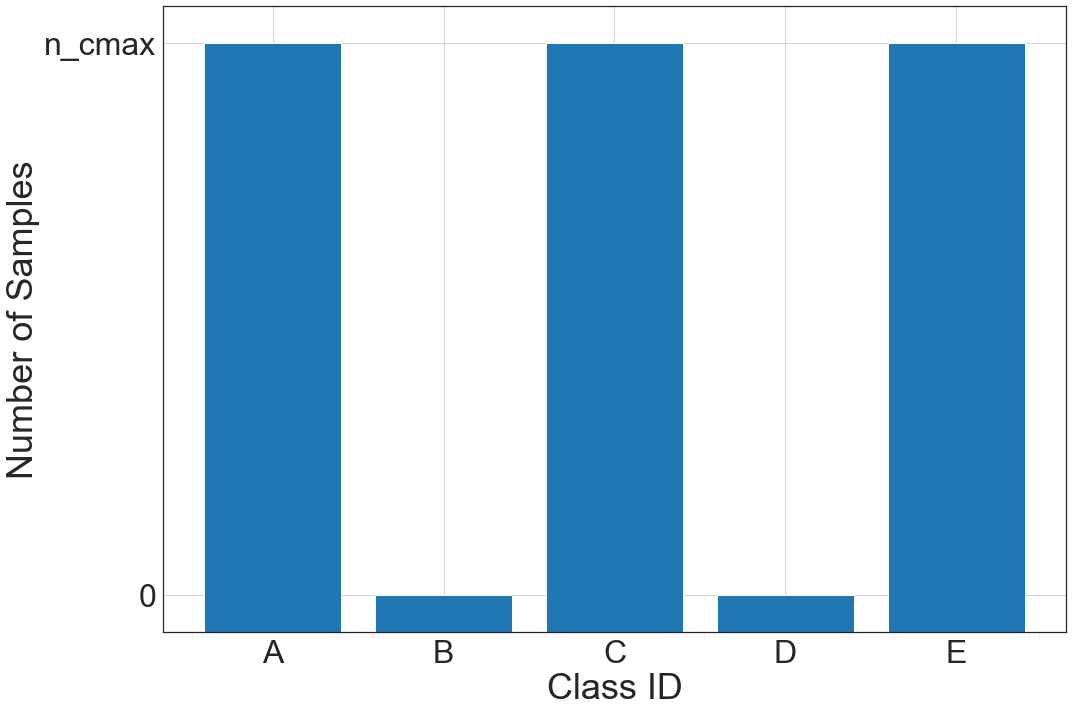

In [53]:
data = [320, 20, 320, 20, 320]

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams["axes.edgecolor"] = "0.15"
plt.rcParams["axes.linewidth"] = 1.25

fig, ax = plt.subplots(figsize=(15, 10))
ax.set_ylim(0, 340)

ax.set_xticks(np.arange(5))
ax.set_yticks([0, 20, 320])
ax.set_xticklabels(['A', 'B', 'C', 'D', 'E'], size=32)
ax.set_yticklabels(['', 0, 'n_cmax'], size=32)

#ax.set_title('Per Class Sample Count, sorted descending', size=24)
ax.set_xlabel('Class ID', size=36)
ax.set_ylabel('Number of Samples', size=36)

ax.bar(np.arange(5), data)

fig.tight_layout()
fig.savefig('../plots/worst_case_class_balance.png', dpi=300)

## Clustering Algorithms

In [12]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, OPTICS, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs

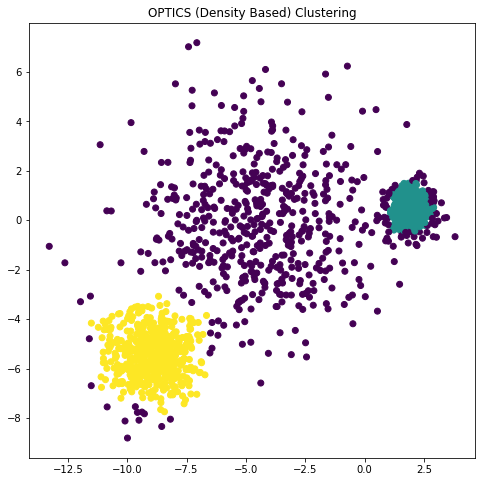

In [38]:
plt.figure(figsize=(8, 8))

n_samples = 1500
random_state = 170

# Different variance
X_varied, y_varied = make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)
# y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)
# y_pred = AgglomerativeClustering(n_clusters=3).fit_predict(X_varied)
# y_pred = GaussianMixture(n_components=3, random_state=random_state).fit_predict(X_varied)
y_pred = OPTICS(min_cluster_size=300).fit_predict(X_varied)

plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("OPTICS (Density Based) Clustering")
plt.savefig('../plots/presentation/optics.png')